# Project: Stock Market Analysis and Prediction

## Stock Market Data From YAHOO

In this module, We would like to explore:

1. change in price of the stock over time
2. daily return of the stock on average
3. moving average of the various stocks
4. correlation between different stocks' closing prices
4. correlation between different stocks' daily returns
5. value at risk by investing in a particular stock
6. try predict future stock behavior

What was the change in price of the stock over time?

In [ ]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader # For reading stock data from yahoo
from datetime import datetime # For time stamps
from __future__ import division # For division

#### Section 1 - Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [ ]:
def get_stock_info(list,  start, source='NS', end=datetime.now()):
  #For-loop for grabing yahoo finance data and setting as a dataframe
  # Set DataFrame as the Stock Ticker
  suffix= '.'+ source

  for stock in list:
      stock= stock + suffix
      globals()[stock.replace(suffix,"").replace('&','n').replace('-','_')] = DataReader(stock,'yahoo',start,end)

In [ ]:
wishlist = ['ONGC','TATAMOTORS','M&M','TALBROAUTO']
starting= datetime(2020,6,1)
get_stock_info(wishlist,starting,'BO')

In [ ]:
ONGC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,86.300003,83.699997,84.599998,83.900002,1227840.0,82.484825
2020-06-02,84.900002,82.599998,84.150002,84.349998,660889.0,82.927231
2020-06-03,87.449997,85.500000,86.000000,86.150002,1020142.0,84.696869
2020-06-04,86.000000,84.000000,85.199997,84.900002,633078.0,83.467957
2020-06-05,88.750000,85.099998,85.500000,86.949997,765293.0,85.483368


In [ ]:
ONGC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,217.000000,217.000000,217.000000,217.000000,2.170000e+02,217.000000
mean,88.236866,85.214516,86.822581,86.546083,1.756345e+06,85.384090
std,14.713896,13.803241,14.292395,14.196169,1.258748e+06,14.453121
min,65.900002,64.150002,65.050003,64.400002,2.752000e+05,63.313736
25%,77.650002,75.449997,76.199997,76.150002,8.806030e+05,74.865547
50%,84.099998,81.800003,83.150002,82.650002,1.396410e+06,81.255905
75%,99.900002,96.800003,98.800003,97.900002,2.233174e+06,96.248680
max,122.300003,117.250000,119.650002,119.000000,7.143570e+06,119.000000


In [ ]:
# General Info
ONGC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2020-06-01 to 2021-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       217 non-null    float64
 1   Low        217 non-null    float64
 2   Open       217 non-null    float64
 3   Close      217 non-null    float64
 4   Volume     217 non-null    float64
 5   Adj Close  217 non-null    float64
dtypes: float64(6)
memory usage: 11.9 KB


let's go ahead and plot out the volume and closing price of the ONGC stocks.

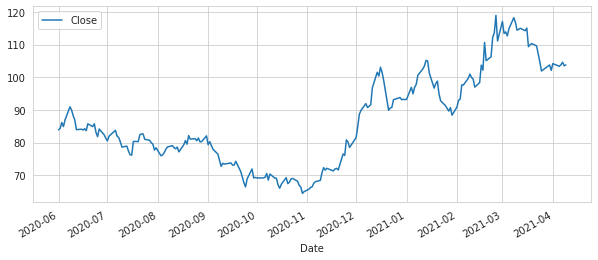

In [ ]:
# historical view of the closing price
ONGC['Close'].plot(legend=True, figsize=(10,4))

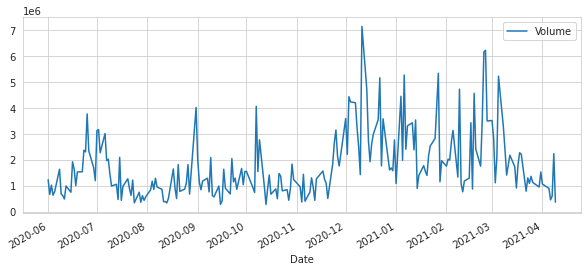

In [ ]:
# total volume of stock being traded each day over the past year

ONGC['Volume'].plot(legend=True, figsize=(10,4))

In [ ]:
# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    ONGC[column_name] = ONGC['Close'].rolling(ma).mean()

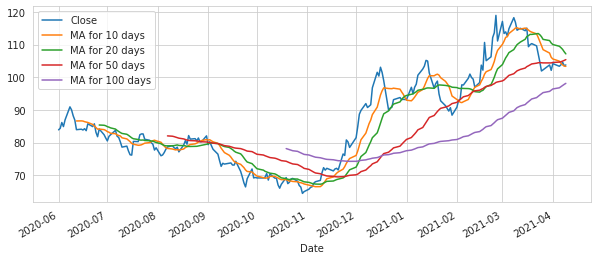

In [ ]:
ONGC[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis


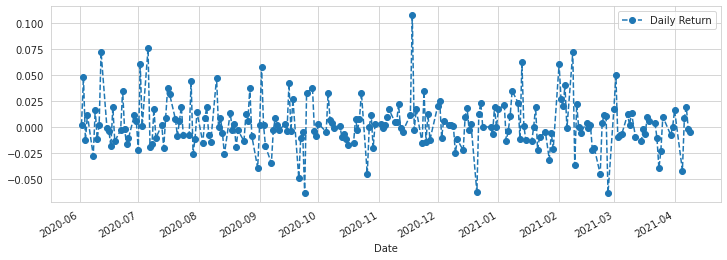

In [ ]:
# We'll use pct_change to find the percent change for each day
MnM['Daily Return'] = MnM['Close'].pct_change()

# Lets plot the daily return percentage
MnM['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

average daily return using a histogram.

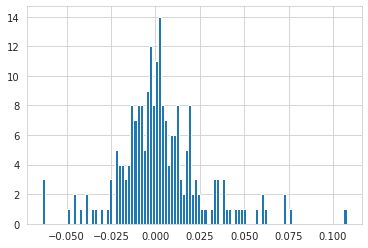

In [ ]:
# only with histogram
MnM['Daily Return'].hist(bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


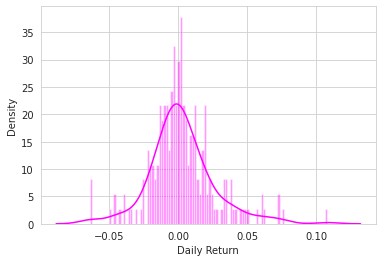

In [ ]:
#use of dropna() here
sns.distplot(MnM['Daily Return'].dropna(), bins=100, color='magenta')

To analyze the returns of all the stocks in our list, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
def get_close_info(list,  start, source='NS', end=datetime.now()):
  #For-loop for grabing yahoo finance data and setting as a dataframe
  # Set DataFrame as the Stock Ticker
  suffix= '.'+ source
  list = [stock + suffix for stock in list]
  return DataReader(list, 'yahoo' ,start, end)['Close']

In [ ]:
closingprice_df= get_close_info(wishlist, starting)
closingprice_df.columns= wishlist

In [ ]:
closingprice_df.head(10)


,ONGC,TATAMOTORS,M&M,TALBROAUTO
Date,,,,
2020-06-01,83.949997,89.550003,461.100006,97.099998
2020-06-02,84.300003,96.500000,462.850006,95.099998
2020-06-03,86.300003,98.750000,485.100006,93.150002
2020-06-04,84.900002,98.500000,478.450012,91.949997
2020-06-05,86.949997,110.750000,484.200012,102.250000
2020-06-08,90.949997,115.449997,470.850006,100.199997
2020-06-09,90.000000,111.449997,478.750000,99.800003
2020-06-10,88.250000,111.400002,472.049988,99.300003
2020-06-11,86.900002,106.150002,474.549988,98.099998


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [ ]:
# make a new tech returns DataFrame
returns = closingprice_df.pct_change()

In [ ]:
returns.head()

,ONGC,TATAMOTORS,M&M,TALBROAUTO
Date,,,,
2020-06-01,NaN,NaN,NaN,NaN
2020-06-02,0.004169,0.077610,0.003795,-0.020597
2020-06-03,0.023725,0.023316,0.048072,-0.020505
2020-06-04,-0.016222,-0.002532,-0.013709,-0.012882
2020-06-05,0.024146,0.124365,0.012018,0.112017


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


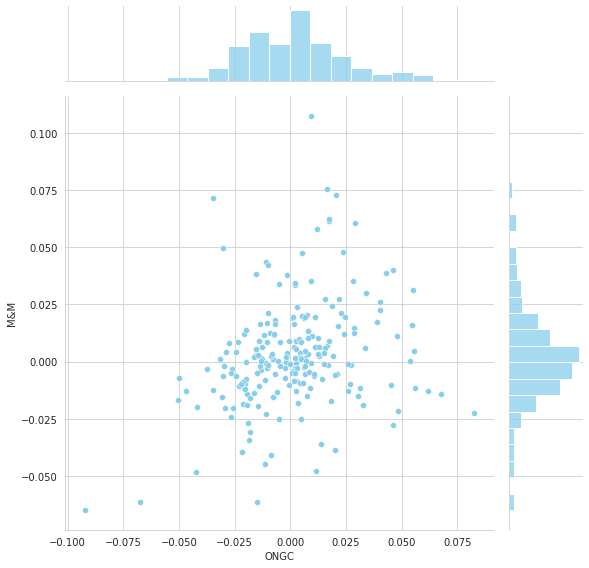

In [ ]:
sns.jointplot('ONGC','M&M',returns, kind='scatter',size=8, color='skyblue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


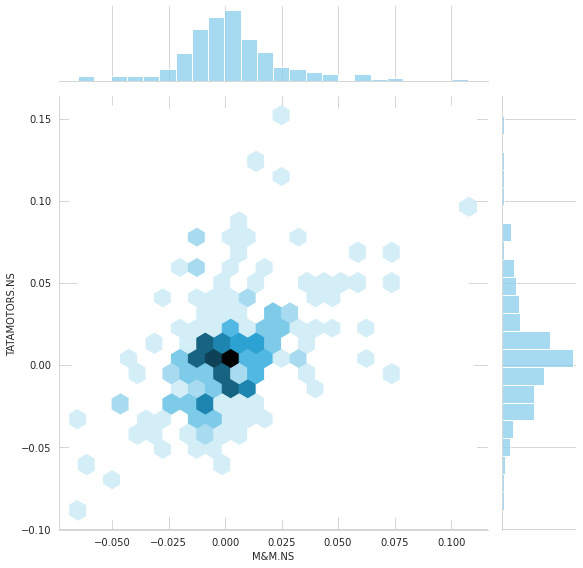

In [ ]:
# with Hex plot
sns.jointplot('M&M','TATAMOTORS',returns, kind='hex',size=8, color='skyblue')

For a quick intuitive sense

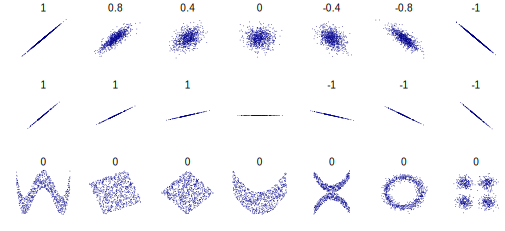

In [ ]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Below we can see all the relationships on daily returns between all the stocks. 

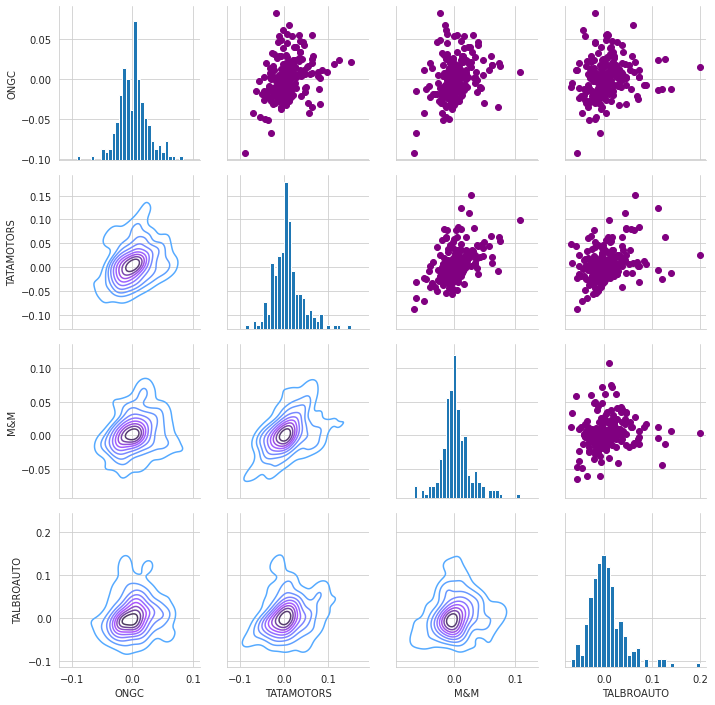

In [ ]:
# Set up the figure
returns_fig = sns.PairGrid(returns.dropna())

# pper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. 

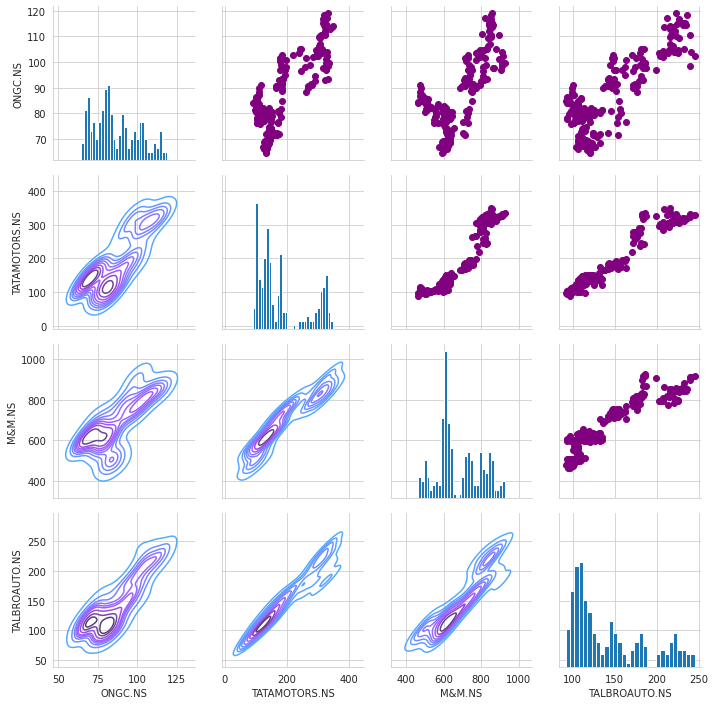

In [ ]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

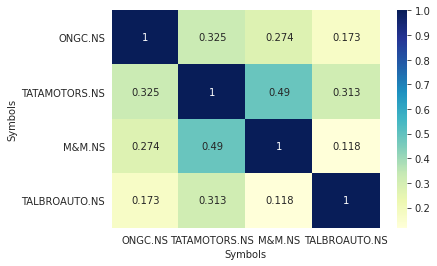

In [ ]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

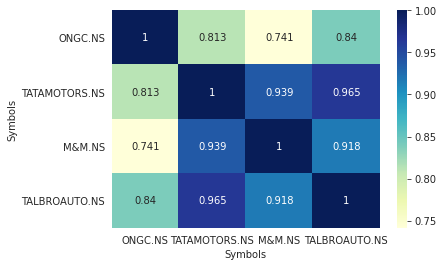

In [ ]:
# correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = returns.dropna()

In [ ]:
rets.head()

,ONGC,TATAMOTORS,M&M,TALBROAUTO
Date,,,,
2020-06-02,0.004169,0.077610,0.003795,-0.020597
2020-06-03,0.023725,0.023316,0.048072,-0.020505
2020-06-04,-0.016222,-0.002532,-0.013709,-0.012882
2020-06-05,0.024146,0.124365,0.012018,0.112017
2020-06-08,0.046003,0.042438,-0.027571,-0.020049


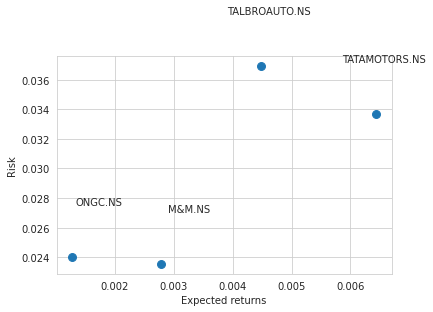

In [ ]:
area = np.pi*20 #area of point, not useful
plt.scatter(rets.mean(),rets.std(),s=area)
#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom')

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk


#### Value at risk using the "bootstrap" method
For this we will calculate the empirical quantiles from a histogram of daily returns.


quantile to get the risk value for the stock.

In [ ]:
# The 0.05 empirical quantile of daily returns
rets["ONGC"].quantile(0.05)

-0.030920180757090243

The 0.05 empirical quantile of daily returns is at -0.031. That means that with 95% confidence, our worst daily loss will not exceed 3.1%. If we have a ₹1000 investment, our one-day 5% VaR is 0.031 * 1,000 = ₹31.

In [ ]:
rets["M&M"].quantile(0.05)

-0.031745188756441334

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.


We assume that the past information on the price of a stock is independent of where the stock price will be in the future,ie you can't perfectly predict the future based on the previous price of a stock.


Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [ ]:
rets.head()

,ONGC,TATAMOTORS,M&M,TALBROAUTO
Date,,,,
2020-06-02,0.004169,0.077610,0.003795,-0.020597
2020-06-03,0.023725,0.023316,0.048072,-0.020505
2020-06-04,-0.016222,-0.002532,-0.013709,-0.012882
2020-06-05,0.024146,0.124365,0.012018,0.112017
2020-06-08,0.046003,0.042438,-0.027571,-0.020049


In [ ]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['ONGC']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['ONGC']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [ ]:
ONGC.head(-5)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2020-06-01,86.300003,83.699997,84.599998,83.900002,1227840.0,82.484825,NaN,NaN,NaN,NaN
2020-06-02,84.900002,82.599998,84.150002,84.349998,660889.0,82.927231,NaN,NaN,NaN,NaN
2020-06-03,87.449997,85.500000,86.000000,86.150002,1020142.0,84.696869,NaN,NaN,NaN,NaN
2020-06-04,86.000000,84.000000,85.199997,84.900002,633078.0,83.467957,NaN,NaN,NaN,NaN
2020-06-05,88.750000,85.099998,85.500000,86.949997,765293.0,85.483368,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-25,107.650002,101.400002,106.400002,101.949997,1359973.0,101.949997,109.770000,112.4800,104.487,94.9435
2021-03-26,104.099998,100.300003,103.199997,102.300003,1125532.0,102.300003,108.495000,111.6450,104.429,95.3170
2021-03-30,106.300003,102.699997,104.349998,103.800003,946658.0,103.800003,107.445000,111.2775,104.405,95.6980


Text(0.5, 1.0, 'Monte Carlo Analysis for ONGC')

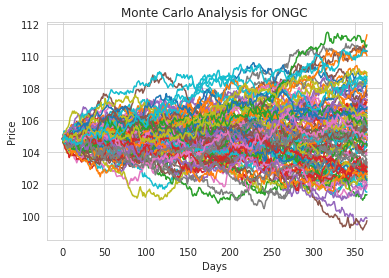

In [ ]:
start_price = 104.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for ONGC')

In [ ]:
# For xyz Stock 
XYZ.head()

In [ ]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for XYZ')

Histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [ ]:
# Lets start with ONGC stock price
start_price = 104.85

# Set a large numebr of runs
runs = 1000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

For more info on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Text(0.5, 1.0, 'Final price distribution for ONGC Stock after 365 days')

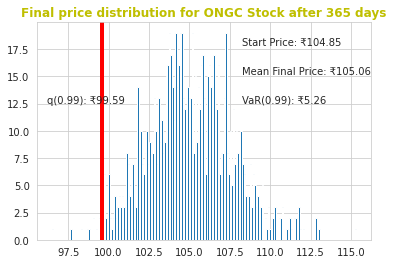

In [ ]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: ₹%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: ₹%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): ₹%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): ₹%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for ONGC Stock after %s days" % days, weight='bold', color='Y')


Value at Risk for the ONGC Stock, which looks to be ₹5.26 for every investment of 
104.85 (The price of one initial ONGC Stock).

This basically means for every initial ONGC stock you purchase you're putting about ₹5.26 at risk 99% of the time from our Monte Carlo Simulation.
